In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
min2net 1.0.1 requires scikit-learn>=0.24.1, but you have scikit-learn 0.23.2 which is incompatible.


In [ ]:
!pip install mne

In [ ]:
!pip install min2net

  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.9 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import numpy as np
from scipy.io import loadmat
from scipy import signal
import os
from tqdm.auto import tqdm
import gc
from matplotlib import pyplot as plt
from scipy.signal import butter, lfilter
from scipy.fft import fft, fftfreq
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
from pycaret.classification import *
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.export import export_epochs
from mne.decoding import CSP
import pickle
import mne
import min2net

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Unused Preprocess

In [ ]:
# offline_label=np.load('/content/drive/MyDrive/Week10-Brain-Wave/Offline-100hz-labels.npy')
# offline_data=np.load('/content/drive/MyDrive/Week10-Brain-Wave/Offline-100hz.npy')
# online_label=np.load('/content/drive/MyDrive/Week10-Brain-Wave/Online-100hz-labels.npy')
# online_data=np.load('/content/drive/MyDrive/Week10-Brain-Wave/Online-100hz.npy')

In [ ]:
# offline_label

In [ ]:
# offline_data

In [ ]:
subj1_sess1=loadmat('/content/drive/Shareddrives/Week10_EEG_Classification/session1/sess01_subj01_EEG_MI.mat')
subj1_sess1

{'EEG_MI_test': array([[(array([[  47.79999924,  -36.59999847,  -29.79999924, ...,  -70.19999695,
                   75.90000153,   35.29999924],
                [  42.09999847,  -40.79999924,  -30.89999962, ...,  -71.80000305,
                   73.        ,   33.20000076],
                [  41.70000076,  -40.79999924,  -29.10000038, ...,  -68.40000153,
                   77.59999847,   36.5       ],
                ...,
                [-103.40000153,  -75.5       ,  -76.        , ...,  -76.09999847,
                  -45.79999924,  -26.        ],
                [ -80.40000153,  -63.5       ,  -94.90000153, ...,  -62.79999924,
                  -33.20000076,  -14.10000038],
                [ -62.09999847,  -61.09999847,  -94.90000153, ...,  -51.09999847,
                  -31.39999962,  -12.89999962]]), array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
                 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
                 0, 1, 1

In [ ]:
subj1_sess1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EEG_MI_train', 'EEG_MI_test'])

In [ ]:
subj1_sess1['EEG_MI_train']

array([[(array([[  43.09999847,   64.69999695,  -31.20000076, ...,   27.        ,
                  37.29999924,   44.90000153],
               [  49.5       ,   72.5       ,  -31.5       , ...,   29.5       ,
                  35.70000076,   47.79999924],
               [  57.20000076,   79.69999695,  -35.59999847, ...,   34.29999924,
                  37.90000153,   51.5       ],
               ...,
               [-171.30000305, -170.69999695, -122.30000305, ..., -122.5       ,
                 -73.09999847,  -58.20000076],
               [-166.69999695, -169.69999695, -118.90000153, ..., -125.69999695,
                 -70.        ,  -57.09999847],
               [-161.6000061 , -166.80000305, -112.        , ..., -125.69999695,
                 -67.30000305,  -52.59999847]]), array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
                0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
                0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0

In [ ]:
subj1_sess1['EEG_MI_train'][0][0]

(array([[  43.09999847,   64.69999695,  -31.20000076, ...,   27.        ,
          37.29999924,   44.90000153],
       [  49.5       ,   72.5       ,  -31.5       , ...,   29.5       ,
          35.70000076,   47.79999924],
       [  57.20000076,   79.69999695,  -35.59999847, ...,   34.29999924,
          37.90000153,   51.5       ],
       ...,
       [-171.30000305, -170.69999695, -122.30000305, ..., -122.5       ,
         -73.09999847,  -58.20000076],
       [-166.69999695, -169.69999695, -118.90000153, ..., -125.69999695,
         -70.        ,  -57.09999847],
       [-161.6000061 , -166.80000305, -112.        , ..., -125.69999695,
         -67.30000305,  -52.59999847]]), array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 

In [ ]:
#x
subj1_sess1['EEG_MI_train'][0][0][0]

array([[  43.09999847,   64.69999695,  -31.20000076, ...,   27.        ,
          37.29999924,   44.90000153],
       [  49.5       ,   72.5       ,  -31.5       , ...,   29.5       ,
          35.70000076,   47.79999924],
       [  57.20000076,   79.69999695,  -35.59999847, ...,   34.29999924,
          37.90000153,   51.5       ],
       ...,
       [-171.30000305, -170.69999695, -122.30000305, ..., -122.5       ,
         -73.09999847,  -58.20000076],
       [-166.69999695, -169.69999695, -118.90000153, ..., -125.69999695,
         -70.        ,  -57.09999847],
       [-161.6000061 , -166.80000305, -112.        , ..., -125.69999695,
         -67.30000305,  -52.59999847]])

In [ ]:
subj1_sess1['EEG_MI_train'][0][0][0].shape

(1464560, 62)

In [ ]:
#y_segment2
subj1_sess1['EEG_MI_train'][0][0][1]

array([[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]], dtype=uint8)

In [ ]:
subj1_sess1['EEG_MI_train'][0][0][1].shape

(1, 100)

In [ ]:
#t
subj1_sess1['EEG_MI_train'][0][0][2]

array([[ 153765,  165300,  175983,  187499,  198632,  209315,  220182,
         231248,  242765,  254281,  264948,  276464,  287997,  299046,
         310380,  321046,  332013,  343529,  354863,  366379,  377612,
         388212,  399628,  411145,  422378,  433711,  445044,  456011,
         467244,  478010,  489260,  499843,  510710,  521293,  531976,
         543309,  554542,  565408,  576925,  587525,  598474,  609441,
         620774,  632106,  642874,  653923,  664890,  676123,  687356,
         829553,  840336,  851569,  862803,  873486,  884169,  895218,
         906735,  917601,  928751,  939534,  950851,  961634,  972684,
         983917,  995350, 1006867, 1018016, 1028683, 1039366, 1050149,
        1061565, 1072348, 1083681, 1094448, 1105964, 1116831, 1127597,
        1138380, 1149529, 1160580, 1171446, 1182863, 1194012, 1205162,
        1216579, 1227445, 1238778, 1250112, 1261078, 1272211, 1282811,
        1293394, 1304444, 1315777, 1327293, 1337976, 1349126, 1360176,
      

In [ ]:
subj1_sess1['EEG_MI_train'][0][0][2].shape

(1, 100)

In [ ]:
#channel
subj1_sess1['EEG_MI_train'][0][0][3]

array(['Fp1   ', 'Fp2   ', 'F7    ', 'F3    ', 'Fz    ', 'F4    ',
       'F8    ', 'FC5   ', 'FC1   ', 'FC2   ', 'FC6   ', 'T7    ',
       'C3    ', 'Cz    ', 'C4    ', 'T8    ', 'TP9   ', 'CP5   ',
       'CP1   ', 'CP2   ', 'CP6   ', 'TP10  ', 'P7    ', 'P3    ',
       'Pz    ', 'P4    ', 'P8    ', 'PO9   ', 'O1    ', 'Oz    ',
       'O2    ', 'PO10  ', 'FC3   ', 'FC4   ', 'C5    ', 'C1    ',
       'C2    ', 'C6    ', 'CP3   ', 'CPz   ', 'CP4   ', 'P1    ',
       'P2    ', 'POz   ', 'FT9   ', 'FTT9h ', 'TTP7h ', 'TP7   ',
       'TPP9h ', 'FT10  ', 'FTT10h', 'TPP8h ', 'TP8   ', 'TPP10h',
       'F9    ', 'F10   ', 'AF7   ', 'AF3   ', 'AF4   ', 'AF8   ',
       'PO3   ', 'PO4   '], dtype='<U6')

In [ ]:
#label_y_segment2
subj1_sess1['EEG_MI_train'][0][0][4]

array([['0                    ', 'right                '],
       ['1                    ', 'left                 ']], dtype='<U21')

In [ ]:
subj1_sess1['EEG_MI_train'][0][0][0][subj1_sess1['EEG_MI_train'][0][0][2][0][0]-2000:subj1_sess1['EEG_MI_train'][0][0][2][0][0]+2000]

array([[-45.79999924, -42.        , -42.09999847, ..., -54.20000076,
         33.70000076,  33.09999847],
       [-40.90000153, -35.5       , -43.29999924, ..., -44.70000076,
         37.79999924,  34.29999924],
       [-43.70000076, -39.20000076, -47.79999924, ..., -47.59999847,
         35.09999847,  30.39999962],
       ...,
       [-21.39999962, -41.79999924, -36.79999924, ..., -37.29999924,
         13.5       , -24.        ],
       [-18.        , -37.70000076, -37.09999847, ..., -33.90000153,
          8.89999962, -22.20000076],
       [-16.5       , -32.        , -36.5       , ..., -27.20000076,
         12.89999962, -19.29999924]])

In [ ]:
subj1_sess1['EEG_MI_train'][0][0][0][subj1_sess1['EEG_MI_train'][0][0][2][0][0]-2000:subj1_sess1['EEG_MI_train'][0][0][2][0][0]+2000].shape

(4000, 62)

In [ ]:
signal.resample(subj1_sess1['EEG_MI_train'][0][0][0][subj1_sess1['EEG_MI_train'][0][0][2][0][0]-2000:subj1_sess1['EEG_MI_train'][0][0][2][0][0]+2000],400)

array([[-36.5982859 , -42.49376664, -42.38714288, ..., -46.98006796,
         20.58063359,   4.2970978 ],
       [-44.81315545, -50.09236042, -43.80052467, ..., -49.92605202,
         35.13320644,  30.84389136],
       [-46.59277796, -56.07090052, -42.92033717, ..., -62.2611782 ,
         36.27093049,  20.54569614],
       ...,
       [-22.07294587, -31.28574799, -35.6336287 , ..., -28.28913872,
          7.00937034, -34.20405941],
       [-27.56845271, -31.80668037, -36.80897477, ..., -25.56840168,
         18.85107392, -16.8769305 ],
       [-16.57169574, -29.29567547, -34.11541904, ..., -18.09917741,
         12.15107759, -26.42836301]])

In [ ]:
signal.resample(subj1_sess1['EEG_MI_train'][0][0][0][subj1_sess1['EEG_MI_train'][0][0][2][0][0]-2000:subj1_sess1['EEG_MI_train'][0][0][2][0][0]+2000],400).shape

(400, 62)

In [ ]:
signal.resample(np.array([[1,2,3],[2,3,4],[3,4,5]]),1)

array([[2., 3., 4.]])

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

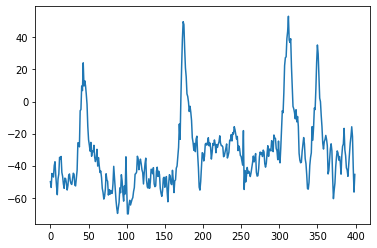

In [ ]:
plt.plot(signal.resample(subj1_sess1['EEG_MI_test'][0][0][0][165300-2000:165300+2000],400)[:,14])

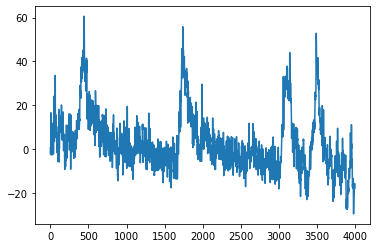

In [ ]:
plt.plot(butter_bandpass_filter(subj1_sess1['EEG_MI_test'][0][0][0][165300-2000:165300+2000],4,30,100)[:,14])

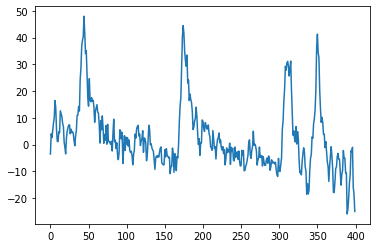

In [ ]:
plt.plot(signal.resample(butter_bandpass_filter(subj1_sess1['EEG_MI_test'][0][0][0][165300-2000:165300+2000],4,30,100)[:,14],400))

In [ ]:
offline_data=[]
offline_label=[]

for i in range(100):

  t=subj1_sess1['EEG_MI_train'][0][0][2][0][i]
  label_segment2=subj1_sess1['EEG_MI_train'][0][0][1][0][i]
  segment1=signal.resample(butter_bandpass_filter(subj1_sess1['EEG_MI_train'][0][0][0][t-2000:t+2000],4,30,100),400)
  segment2=signal.resample(butter_bandpass_filter(subj1_sess1['EEG_MI_train'][0][0][0][t:t+4000],4,30,100),400)

  if label_segment2==0:
    label_segment1=2
  else: #label_segment2==1
    label_segment1=3

  offline_data.append(segment1)
  offline_data.append(segment2)
  offline_label.append(label_segment1)
  offline_label.append(label_segment2)

offline_data=np.array(offline_data).reshape((-1,62,400))
offline_label=np.array(offline_label)

In [ ]:
offline_data.shape

(200, 62, 400)

In [ ]:
offline_label.shape

(200,)

In [ ]:
del offline_data, offline_label, subj1_sess1
gc.collect()

224

In [ ]:
test=np.load('/content/drive/Shareddrives/Week10_EEG_Classification/x_test.npy')

In [ ]:
test.shape

(400, 62, 4000)

In [ ]:
os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1')

['sess01_subj05_EEG_MI.mat',
 'sess01_subj12_EEG_MI.mat',
 'sess01_subj30_EEG_MI.mat',
 'sess01_subj24_EEG_MI.mat',
 'sess01_subj09_EEG_MI.mat',
 'sess01_subj26_EEG_MI.mat',
 'sess01_subj32_EEG_MI.mat',
 'sess01_subj13_EEG_MI.mat',
 'sess01_subj23_EEG_MI.mat',
 'sess01_subj47_EEG_MI.mat',
 'sess01_subj50_EEG_MI.mat',
 'sess01_subj18_EEG_MI.mat',
 'sess01_subj21_EEG_MI.mat',
 'sess01_subj07_EEG_MI.mat',
 'sess01_subj20_EEG_MI.mat',
 'sess01_subj16_EEG_MI.mat',
 'sess01_subj19_EEG_MI.mat',
 'sess01_subj10_EEG_MI.mat',
 'sess01_subj37_EEG_MI.mat',
 'sess01_subj35_EEG_MI.mat',
 'sess01_subj52_EEG_MI.mat',
 'sess01_subj51_EEG_MI.mat',
 'sess01_subj11_EEG_MI.mat',
 'sess01_subj17_EEG_MI.mat',
 'sess01_subj38_EEG_MI.mat',
 'sess01_subj02_EEG_MI.mat',
 'sess01_subj36_EEG_MI.mat',
 'sess01_subj22_EEG_MI.mat',
 'sess01_subj49_EEG_MI.mat',
 'sess01_subj06_EEG_MI.mat',
 'sess01_subj08_EEG_MI.mat',
 'sess01_subj01_EEG_MI.mat',
 'sess01_subj03_EEG_MI.mat',
 'sess01_subj25_EEG_MI.mat',
 'sess01_subj3

In [ ]:
#offline data preprocess

offline_data=[]
offline_label=[]

sess1_path='/content/drive/Shareddrives/Week10_EEG_Classification/session1/'
for sess1_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1')):
  file_path=sess1_path+sess1_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_train'][0][0][2][0][i]
    label_segment2=matlab_file['EEG_MI_train'][0][0][1][0][i]
    segment1=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_train'][0][0][0][t-2000:t+2000],4,30,100),400)
    segment2=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_train'][0][0][0][t:t+4000],4,30,100),400)

    if label_segment2==0:
      label_segment1=2
    else: #label_segment2==1
      label_segment1=3

    offline_data.append(segment1)
    offline_data.append(segment2)
    offline_label.append(label_segment1)
    offline_label.append(label_segment2)

  del matlab_file
  gc.collect()

100%|██████████| 52/52 [07:43<00:00,  8.92s/it]


In [ ]:
sess2_path='/content/drive/Shareddrives/Week10_EEG_Classification/session2/'
for sess2_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session2')):
  file_path=sess2_path+sess2_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_train'][0][0][2][0][i]
    label_segment2=matlab_file['EEG_MI_train'][0][0][1][0][i]
    segment1=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_train'][0][0][0][t-2000:t+2000],4,30,100),400)
    segment2=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_train'][0][0][0][t:t+4000],4,30,100),400)

    if label_segment2==0:
      label_segment1=2
    else: #label_segment2==1
      label_segment1=3

    offline_data.append(segment1)
    offline_data.append(segment2)
    offline_label.append(label_segment1)
    offline_label.append(label_segment2)

  del matlab_file
  gc.collect()

offline_data=np.array(offline_data).reshape((-1,62,400))
offline_label=np.array(offline_label)

100%|██████████| 52/52 [08:38<00:00,  9.98s/it]


In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/offline_data.npy',offline_data)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/offline_label.npy',offline_label)

In [ ]:
del offline_data, offline_label
gc.collect()

94

In [ ]:
#online data preprocess

online_data=[]
online_label=[]

sess1_path='/content/drive/Shareddrives/Week10_EEG_Classification/session1/'
for sess1_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1')):
  file_path=sess1_path+sess1_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_test'][0][0][2][0][i]
    label_segment2=matlab_file['EEG_MI_test'][0][0][1][0][i]
    segment1=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t-2000:t+2000],4,30,100),400)
    segment2=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t:t+4000],4,30,100),400)

    if label_segment2==0:
      label_segment1=2
    else: #label_segment2==1
      label_segment1=3

    online_data.append(segment1)
    online_data.append(segment2)
    online_label.append(label_segment1)
    online_label.append(label_segment2)

  del matlab_file
  gc.collect()

100%|██████████| 52/52 [08:30<00:00,  9.82s/it]


In [ ]:
sess2_path='/content/drive/Shareddrives/Week10_EEG_Classification/session2/'
for sess2_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session2')):
  file_path=sess2_path+sess2_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_test'][0][0][2][0][i]
    label_segment2=matlab_file['EEG_MI_test'][0][0][1][0][i]
    segment1=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t-2000:t+2000],4,30,100),400)
    segment2=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t:t+4000],4,30,100),400)

    if label_segment2==0:
      label_segment1=2
    else: #label_segment2==1
      label_segment1=3

    online_data.append(segment1)
    online_data.append(segment2)
    online_label.append(label_segment1)
    online_label.append(label_segment2)

  del matlab_file
  gc.collect()

online_data=np.array(online_data).reshape((-1,62,400))
online_label=np.array(online_label)

100%|██████████| 52/52 [08:28<00:00,  9.77s/it]


In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_data_4_30.npy',online_data)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_label_4_30.npy',online_label)

In [ ]:
del online_data, online_label
gc.collect()

103

In [ ]:
x_test=np.load('/content/drive/Shareddrives/Week10_EEG_Classification/x_test.npy')

In [ ]:
x_test

array([[[-5.80000000e+01, -6.02999992e+01, -5.82999992e+01, ...,
          3.30999985e+01,  4.49000015e+01,  4.00999985e+01],
        [ 4.67200012e+02,  4.74000000e+02,  4.75200012e+02, ...,
          5.21299988e+02,  5.31000000e+02,  5.25099976e+02],
        [-3.02999992e+01, -3.02000008e+01, -2.87000008e+01, ...,
          6.40000010e+00,  1.21000004e+01,  7.90000010e+00],
        ...,
        [ 5.45000000e+01,  4.40000000e+01,  4.37999992e+01, ...,
          8.80000000e+01,  8.85000000e+01,  8.40000000e+01],
        [ 2.42000008e+01,  2.17000008e+01,  2.23999996e+01, ...,
         -4.00000000e+00,  6.40000010e+00,  1.03000002e+01],
        [ 2.95000000e+01,  2.92999992e+01,  2.98999996e+01, ...,
         -5.40000010e+00,  6.19999981e+00,  9.00000000e+00]],

       [[-3.47000008e+01, -2.96000004e+01, -2.82999992e+01, ...,
          3.95999985e+01,  4.05000000e+01,  4.29000015e+01],
        [-8.50999985e+01, -8.50999985e+01, -8.44000015e+01, ...,
         -2.32000008e+01, -2.37000008e

In [ ]:
x_test.shape

(400, 62, 4000)

In [ ]:
x_test[0].shape

(62, 4000)

In [ ]:
signal.resample(x_test[0].reshape(4000,62),400).shape

(400, 62)

In [ ]:
resample_test=[]
for index in range(x_test.shape[0]):
  resample_array=signal.resample(butter_bandpass_filter(x_test[index].reshape(4000,62),4,30,100),400)
  resample_test.append(resample_array)

resample_test=np.array(resample_test).reshape(-1,62,400)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/x_test_4_30.npy',resample_test)

In [ ]:
del x_test, resample_test
gc.collect()

302

# Preprocess

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq

    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

In [ ]:
subj1_sess1=loadmat('/content/drive/Shareddrives/Week10_EEG_Classification/session1/sess01_subj01_EEG_MI.mat')

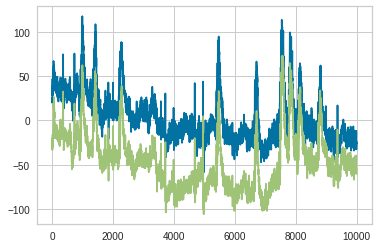

In [ ]:
plt.plot(signal.resample(subj1_sess1['EEG_MI_test'][0][0][0][157921-3000:157921+7000],10000)[:,[12,14]])

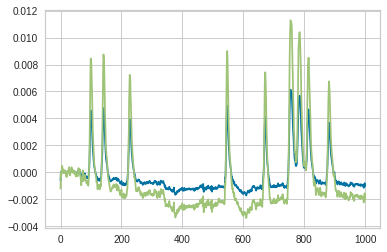

In [ ]:
plt.plot(signal.resample(butter_bandpass_filter(subj1_sess1['EEG_MI_test'][0][0][0][157921-3000:157921+7000],8,12,1000),1000)[:,[12,14]])

In [ ]:
online_data_no_segment=[]
online_label_no_segment=[]

matlab_file=subj1_sess1

for i in range(100):
  t=matlab_file['EEG_MI_test'][0][0][2][0][i]
  label=matlab_file['EEG_MI_test'][0][0][1][0][i]
  x=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t-3000:t+7000],8,12,1000),1000)

  online_data_no_segment.append(x)
  online_label_no_segment.append(label)

del matlab_file
gc.collect()

61

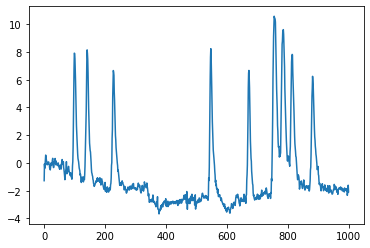

In [ ]:
plt.plot(np.array(online_data_no_segment)[0,:,14])

In [ ]:
#online data preprocess

online_data_no_segment=[]
online_label_no_segment=[]

sess1_path='/content/drive/Shareddrives/Week10_EEG_Classification/session1/'
for sess1_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1')):
  file_path=sess1_path+sess1_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_test'][0][0][2][0][i]
    label=matlab_file['EEG_MI_test'][0][0][1][0][i]
    x=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t-3000:t+7000],8,12,1000),1000)

    online_data_no_segment.append(x)
    online_label_no_segment.append(label)

  del matlab_file
  gc.collect()

100%|██████████| 52/52 [08:52<00:00, 10.25s/it]


In [ ]:
sess2_path='/content/drive/Shareddrives/Week10_EEG_Classification/session2/'
for sess2_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session2')):
  file_path=sess2_path+sess2_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_test'][0][0][2][0][i]
    label=matlab_file['EEG_MI_test'][0][0][1][0][i]
    x=signal.resample(butter_bandpass_filter(matlab_file['EEG_MI_test'][0][0][0][t-3000:t+7000],8,12,1000),1000)

    online_data_no_segment.append(x)
    online_label_no_segment.append(label)

  del matlab_file
  gc.collect()

online_data_no_segment=np.array(online_data_no_segment)
online_label_no_segment=np.array(online_label_no_segment)

100%|██████████| 52/52 [08:53<00:00, 10.27s/it]


In [ ]:
online_data_no_segment.shape

(10400, 1000, 62)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_data_no_segment_8_12.npy',online_data_no_segment)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_label_no_segment_8_12.npy',online_label_no_segment)

In [ ]:
del online_data_no_segment, online_label_no_segment
gc.collect()

153

In [ ]:
#online data preprocess

online_data_no_bandpass=[]
online_label_no_bandpass=[]

sess1_path='/content/drive/Shareddrives/Week10_EEG_Classification/session1/'
for sess1_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1')):
  file_path=sess1_path+sess1_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_test'][0][0][2][0][i]
    label=matlab_file['EEG_MI_test'][0][0][1][0][i]
    x=signal.resample(matlab_file['EEG_MI_test'][0][0][0][t-3000:t+7000],1000)

    online_data_no_bandpass.append(x)
    online_label_no_bandpass.append(label)

  del matlab_file
  gc.collect()

100%|██████████| 52/52 [07:53<00:00,  9.11s/it]


In [ ]:
sess2_path='/content/drive/Shareddrives/Week10_EEG_Classification/session2/'
for sess2_file in tqdm(os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session2')):
  file_path=sess2_path+sess2_file
  matlab_file=loadmat(file_path)

  for i in range(100):
    t=matlab_file['EEG_MI_test'][0][0][2][0][i]
    label=matlab_file['EEG_MI_test'][0][0][1][0][i]
    x=signal.resample(matlab_file['EEG_MI_test'][0][0][0][t-3000:t+7000],1000)

    online_data_no_bandpass.append(x)
    online_label_no_bandpass.append(label)

  del matlab_file
  gc.collect()

online_data_no_bandpass=np.array(online_data_no_bandpass)
online_label_no_bandpass=np.array(online_label_no_bandpass)

100%|██████████| 52/52 [07:50<00:00,  9.05s/it]


In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_data_no_bandpass.npy',online_data_no_bandpass)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_label_no_bandpass.npy',online_label_no_bandpass)

In [ ]:
x_test=np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/x_test.npy')

In [ ]:
resample_test=[]
for index in range(x_test.shape[0]):
  resample_array=signal.resample(butter_bandpass_filter(x_test[index],9,29,1000),400,axis=1)
  resample_test.append(resample_array)

resample_test=np.array(resample_test)

In [ ]:
resample_test.shape

(400, 62, 400)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/x_test_2_29',resample_test)

# Explore Data

In [ ]:
subj1_sess1=loadmat('/content/drive/Shareddrives/Week10_EEG_Classification/session1/sess01_subj01_EEG_MI.mat')
subj1_sess1

{'EEG_MI_test': array([[(array([[  47.79999924,  -36.59999847,  -29.79999924, ...,  -70.19999695,
                   75.90000153,   35.29999924],
                [  42.09999847,  -40.79999924,  -30.89999962, ...,  -71.80000305,
                   73.        ,   33.20000076],
                [  41.70000076,  -40.79999924,  -29.10000038, ...,  -68.40000153,
                   77.59999847,   36.5       ],
                ...,
                [-103.40000153,  -75.5       ,  -76.        , ...,  -76.09999847,
                  -45.79999924,  -26.        ],
                [ -80.40000153,  -63.5       ,  -94.90000153, ...,  -62.79999924,
                  -33.20000076,  -14.10000038],
                [ -62.09999847,  -61.09999847,  -94.90000153, ...,  -51.09999847,
                  -31.39999962,  -12.89999962]]), array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
                 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
                 0, 1, 1

In [ ]:
subj1_sess1['EEG_MI_train'][0][0][3]

array(['Fp1   ', 'Fp2   ', 'F7    ', 'F3    ', 'Fz    ', 'F4    ',
       'F8    ', 'FC5   ', 'FC1   ', 'FC2   ', 'FC6   ', 'T7    ',
       'C3    ', 'Cz    ', 'C4    ', 'T8    ', 'TP9   ', 'CP5   ',
       'CP1   ', 'CP2   ', 'CP6   ', 'TP10  ', 'P7    ', 'P3    ',
       'Pz    ', 'P4    ', 'P8    ', 'PO9   ', 'O1    ', 'Oz    ',
       'O2    ', 'PO10  ', 'FC3   ', 'FC4   ', 'C5    ', 'C1    ',
       'C2    ', 'C6    ', 'CP3   ', 'CPz   ', 'CP4   ', 'P1    ',
       'P2    ', 'POz   ', 'FT9   ', 'FTT9h ', 'TTP7h ', 'TP7   ',
       'TPP9h ', 'FT10  ', 'FTT10h', 'TPP8h ', 'TP8   ', 'TPP10h',
       'F9    ', 'F10   ', 'AF7   ', 'AF3   ', 'AF4   ', 'AF8   ',
       'PO3   ', 'PO4   '], dtype='<U6')

In [ ]:
del subj1_sess1
gc.collect()

1011

In [ ]:
online_data_no_segment=np.float32(np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/online_data_no_bandpass.npy'))
online_label_no_segment=np.float32(np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/online_label_no_bandpass.npy'))

In [ ]:
online_data_no_segment.shape

(10400, 1000, 62)

In [ ]:
#reference period
ref=np.float32(online_data_no_segment[:,:100,:])**2

In [ ]:
ref_C3=ref[:,:,12].mean(axis=0).mean()
ref_C4=ref[:,:,14].mean(axis=0).mean()

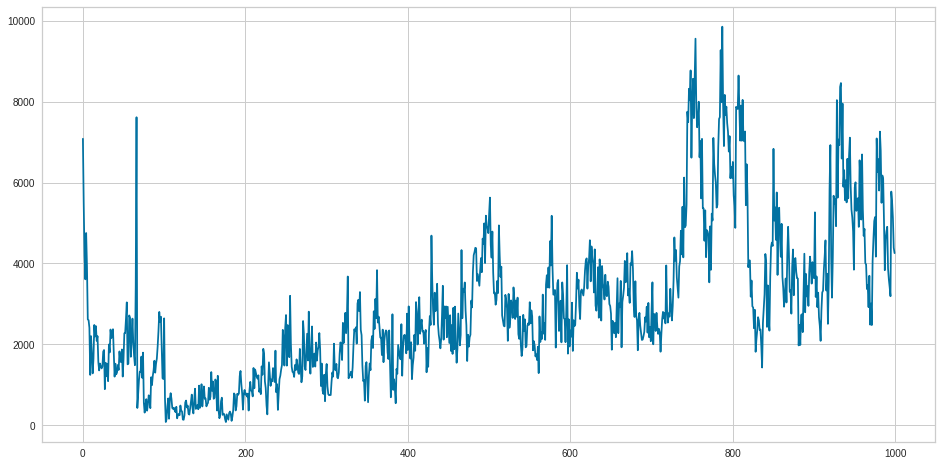

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(online_data_no_segment[0,:,12]**2)

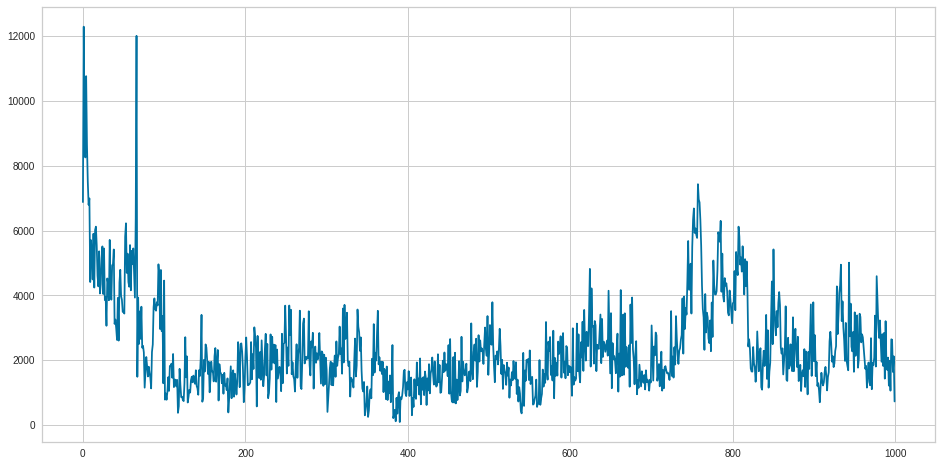

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(online_data_no_segment[0,:,14]**2)

In [ ]:
C3_right=[]
C4_right=[]
C3_left=[]
C4_left=[]

for i in range(10400):
  C3_power=online_data_no_segment[i,:,12]**2
  C4_power=online_data_no_segment[i,:,14]**2
  if online_label_no_segment[i]==0:
    C3_right.append(C3_power)
    C4_right.append(C4_power)
  else:
    C3_left.append(C3_power)
    C4_left.append(C4_power)

C3_right=np.array(C3_right)
C4_right=np.array(C4_right)
C3_left=np.array(C3_left)
C4_left=np.array(C4_left)

In [ ]:
C3_right=np.array(C3_right).mean(axis=0)
C4_right=np.array(C4_right).mean(axis=0)
C3_left=np.array(C3_left).mean(axis=0)
C4_left=np.array(C4_left).mean(axis=0)

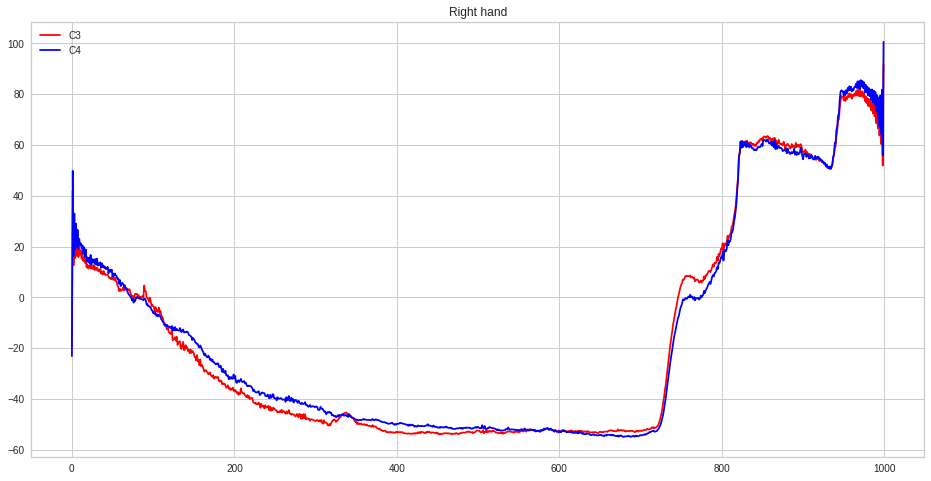

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Right hand')
plt.plot((C3_right-ref_C3)*100/ref_C3,color='red',label='C3')
plt.plot((C4_right-ref_C4)*100/ref_C4,color='blue',label='C4')
plt.legend(loc='best')

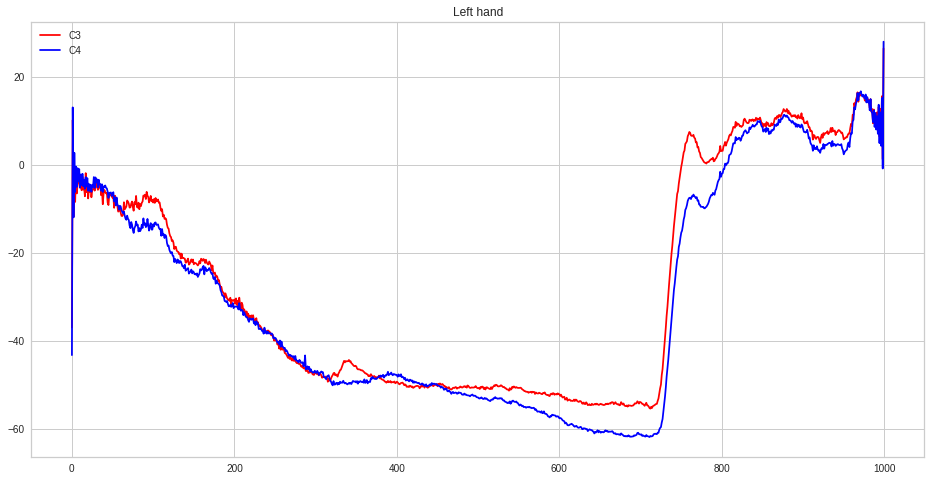

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Left hand')
plt.plot((C3_left-ref_C3)*100/ref_C3,color='red',label='C3')
plt.plot((C4_left-ref_C4)*100/ref_C4,color='blue',label='C4')
plt.legend(loc='best')

In [ ]:
ERDS=[]

for i in range(10400):
  C3_power=online_data_no_segment[i,:,12]**2
  C4_power=online_data_no_segment[i,:,14]**2

  ERDS.append([(C3_power-ref_C3)*100/ref_C3,(C4_power-ref_C4)*100/ref_C4])

ERDS=np.float32(np.array(ERDS))

In [ ]:
ERDS.shape

(10400, 2, 1000)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/ERD_10s.npy',ERDS)

In [ ]:
del ERDS,C3_left,C4_left,C3_right,C4_right,online_data_no_segment,online_label_no_segment
gc.collect()

190

# Segment Data

In [ ]:
ERD_10s=np.float32(np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/ERD_10s.npy'))
online_label_no_segment=np.float32(np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/online_label_no_bandpass.npy'))

In [ ]:
ERD_10s.shape

(10400, 2, 1000)

label : 1.0


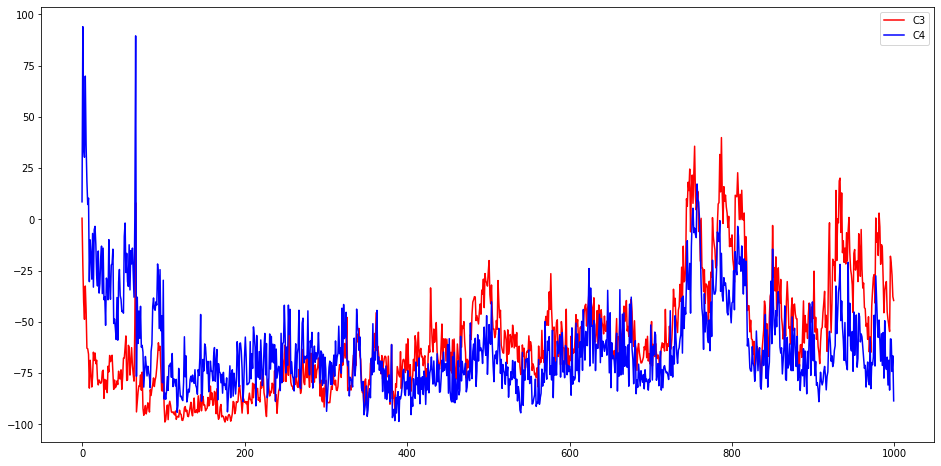

In [ ]:
plt.figure(figsize=(16,8))
print('label :',online_label_no_segment[0])
plt.plot(ERD_10s[0,0,:],color='red',label='C3')
plt.plot(ERD_10s[0,1,:],color='blue',label='C4')
plt.legend(loc='best')

label : 0.0


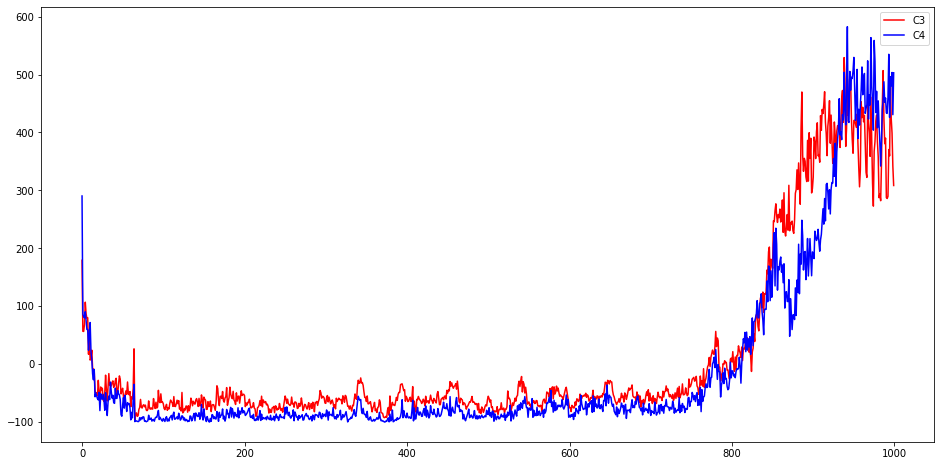

In [ ]:
plt.figure(figsize=(16,8))
print('label :',online_label_no_segment[5])
plt.plot(ERD_10s[5,0,:],color='red',label='C3')
plt.plot(ERD_10s[5,1,:],color='blue',label='C4')
plt.legend(loc='best')

In [ ]:
segment_label=[]
segment_data=[]

for i in range(ERD_10s.shape[0]):
  label2=online_label_no_segment[i]
  segment1=ERD_10s[i,:,100:500]
  segment2=ERD_10s[i,:,300:700]

  if label2==0:
    label1=2
  else: #label2==1
    label1=3
  
  segment_data.append(segment1)
  segment_data.append(segment2)
  segment_label.append(label1)
  segment_label.append(label2)

segment_label=np.array(segment_label)
segment_data=np.array(segment_data)

label : 3.0


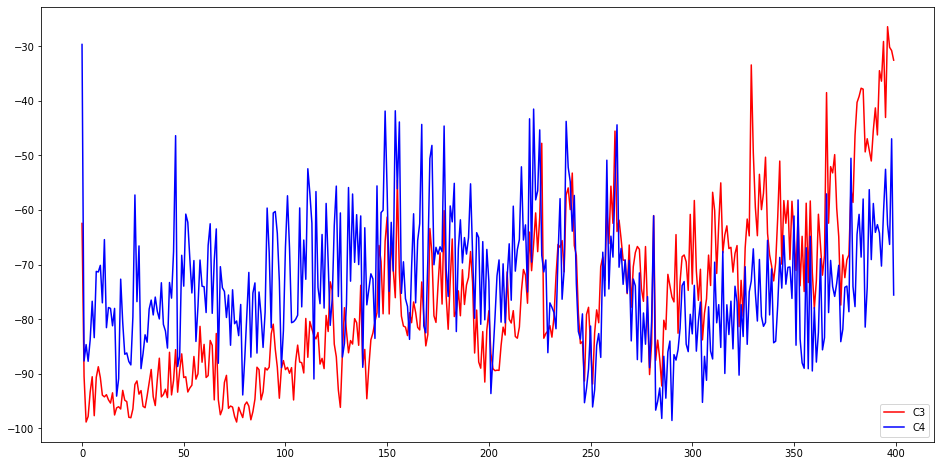

In [ ]:
plt.figure(figsize=(16,8))
print('label :',segment_label[0])
plt.plot(segment_data[0,0,:],color='red',label='C3')
plt.plot(segment_data[0,1,:],color='blue',label='C4')
plt.legend(loc='best')

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/segment_label.npy',segment_label)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/segment_data.npy',segment_data)

In [ ]:
del segment_label,segment_data,ERD_10s,online_label_no_segment
gc.collect()

840

# ML

In [ ]:
segment_label=np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/segment_label.npy')
segment_data=np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/segment_data.npy')

In [ ]:
segment_data.shape

(20800, 2, 400)

In [ ]:
a=np.array([1,2,3])
b=np.array([4,5,6])
np.concatenate([a,b])

array([1, 2, 3, 4, 5, 6])

In [ ]:
full_features=[]
for i in range(segment_data.shape[0]):
  C3=segment_data[i,0,:]
  C4=segment_data[i,1,:]
  full_feature=np.concatenate([C3,C4])
  full_features.append(full_feature)

full_features=np.array(full_features)

In [ ]:
full_features.shape

(20800, 800)

In [ ]:
pca=PCA(n_components=6)
pca.fit(full_features)

PCA(n_components=6)

In [ ]:
print(np.array(pca.explained_variance_ratio_).sum())

0.9604796


In [ ]:
short_features=pca.transform(full_features)
short_features.shape

(20800, 6)

In [ ]:
segment_label.shape

(20800,)

In [ ]:
df=pd.DataFrame(short_features)
df.head()

,0,1,2,3,4,5
0,-851.897949,-280.251251,28.689560,26.880116,80.610229,119.569107
1,-611.258057,-267.591461,201.720108,-39.676903,76.183235,32.027504
2,-159.103729,52.165833,331.229675,81.574005,-21.482651,-191.460480
3,-246.824692,-301.725220,210.942123,-118.090096,174.779022,-21.347378
4,-1.190369,-7.384842,739.355652,-65.350891,153.377808,156.768387


In [ ]:
df=df.rename(columns={0:'PC0',1:'PC1',2:'PC2',3:'PC3',4:'PC4',5:'PC5'})
df=pd.concat([df,pd.Series(segment_label)],axis=1).rename(columns={0:'label'})
df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,label
0,-851.897949,-280.251251,28.689560,26.880116,80.610229,119.569107,3.0
1,-611.258057,-267.591461,201.720108,-39.676903,76.183235,32.027504,1.0
2,-159.103729,52.165833,331.229675,81.574005,-21.482651,-191.460480,3.0
3,-246.824692,-301.725220,210.942123,-118.090096,174.779022,-21.347378,1.0
4,-1.190369,-7.384842,739.355652,-65.350891,153.377808,156.768387,3.0


In [ ]:
models=setup(data=df, target='label', train_size=0.8,
               numeric_features=['PC0','PC1','PC2','PC3','PC4','PC5'],
               normalize=True,
               silent=True)

best_model=compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3316,0.6087,0.3317,0.3313,0.3234,0.1089,0.1107,6.140
lightgbm,Light Gradient Boosting Machine,0.3284,0.6108,0.3285,0.3285,0.3255,0.1046,0.1052,0.653
et,Extra Trees Classifier,0.3266,0.5966,0.3266,0.3267,0.3257,0.1022,0.1024,1.288
rf,Random Forest Classifier,0.3231,0.5980,0.3232,0.3230,0.3222,0.0976,0.0978,1.763
ada,Ada Boost Classifier,0.3203,0.5928,0.3203,0.3190,0.3152,0.0938,0.0946,0.424
knn,K Neighbors Classifier,0.3075,0.5670,0.3077,0.3108,0.3031,0.0770,0.0779,0.171
lda,Linear Discriminant Analysis,0.2981,0.5660,0.2981,0.3040,0.2646,0.0642,0.0704,0.022
ridge,Ridge Classifier,0.2975,0.0000,0.2974,0.3032,0.2651,0.0634,0.0691,0.015
lr,Logistic Regression,0.2955,0.5693,0.2956,0.3076,0.2589,0.0609,0.0689,0.519
dt,Decision Tree Classifier,0.2856,0.5237,0.2856,0.2854,0.2854,0.0474,0.0474,0.078


# Convert Matlab to MNE

In [ ]:
sess_subj1=loadmat('/content/drive/Shareddrives/Week10_EEG_Classification/session1/sess01_subj01_EEG_MI.mat')

In [ ]:
sess_subj1['EEG_MI_test']

array([[(array([[  47.79999924,  -36.59999847,  -29.79999924, ...,  -70.19999695,
                  75.90000153,   35.29999924],
               [  42.09999847,  -40.79999924,  -30.89999962, ...,  -71.80000305,
                  73.        ,   33.20000076],
               [  41.70000076,  -40.79999924,  -29.10000038, ...,  -68.40000153,
                  77.59999847,   36.5       ],
               ...,
               [-103.40000153,  -75.5       ,  -76.        , ...,  -76.09999847,
                 -45.79999924,  -26.        ],
               [ -80.40000153,  -63.5       ,  -94.90000153, ...,  -62.79999924,
                 -33.20000076,  -14.10000038],
               [ -62.09999847,  -61.09999847,  -94.90000153, ...,  -51.09999847,
                 -31.39999962,  -12.89999962]]), array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
                0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
                0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0

In [ ]:
chan_names=sess_subj1['EEG_MI_test'][0][0][3]
chan_names

array(['Fp1   ', 'Fp2   ', 'F7    ', 'F3    ', 'Fz    ', 'F4    ',
       'F8    ', 'FC5   ', 'FC1   ', 'FC2   ', 'FC6   ', 'T7    ',
       'C3    ', 'Cz    ', 'C4    ', 'T8    ', 'TP9   ', 'CP5   ',
       'CP1   ', 'CP2   ', 'CP6   ', 'TP10  ', 'P7    ', 'P3    ',
       'Pz    ', 'P4    ', 'P8    ', 'PO9   ', 'O1    ', 'Oz    ',
       'O2    ', 'PO10  ', 'FC3   ', 'FC4   ', 'C5    ', 'C1    ',
       'C2    ', 'C6    ', 'CP3   ', 'CPz   ', 'CP4   ', 'P1    ',
       'P2    ', 'POz   ', 'FT9   ', 'FTT9h ', 'TTP7h ', 'TP7   ',
       'TPP9h ', 'FT10  ', 'FTT10h', 'TPP8h ', 'TP8   ', 'TPP10h',
       'F9    ', 'F10   ', 'AF7   ', 'AF3   ', 'AF4   ', 'AF8   ',
       'PO3   ', 'PO4   '], dtype='<U6')

In [ ]:
index_list=[]
for i in range(len(chan_names)):
  channel=chan_names[i]
  if 'C' in channel:
    index_list.append(i)
index_list

[7, 8, 9, 10, 12, 13, 14, 17, 18, 19, 20, 32, 33, 34, 35, 36, 37, 38, 39, 40]

In [ ]:
chan_names[index_list]

array(['FC5   ', 'FC1   ', 'FC2   ', 'FC6   ', 'C3    ', 'Cz    ',
       'C4    ', 'CP5   ', 'CP1   ', 'CP2   ', 'CP6   ', 'FC3   ',
       'FC4   ', 'C5    ', 'C1    ', 'C2    ', 'C6    ', 'CP3   ',
       'CPz   ', 'CP4   '], dtype='<U6')

In [ ]:
len(chan_names[index_list])

20

In [ ]:
event_id = dict(right_hand = 0, left_hand = 1, right_hand_transitional = 2, left_hand_transitional = 3)
event_id

{'left_hand': 1,
 'left_hand_transitional': 3,
 'right_hand': 0,
 'right_hand_transitional': 2}

In [ ]:
n_channels = len(chan_names)
n_channels

62

In [ ]:
new_chan_names=[]
for ch in chan_names:
  new_chan_names.append(ch.rstrip(' '))

In [ ]:
info = mne.create_info(
        ch_names = new_chan_names,
        ch_types = ['eeg']*n_channels,
        sfreq    = 1000 
        )   

print('Event created :', info)

Event created : <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 62 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 62
 projs: []
 sfreq: 1000.0 Hz
>


In [ ]:
sess_subj1['EEG_MI_test'][0][0][1]

array([[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1]], dtype=uint8)

In [ ]:
sess_subj1['EEG_MI_test'][0][0][2]

array([[ 157921,  171321,  184220,  197320,  210053,  223236,  236053,
         249335,  262619,  275902,  288902,  301535,  314351,  327817,
         340534,  353917,  367017,  380566,  393200,  406199,  418832,
         432399,  444932,  458315,  471681,  485064,  497697,  510697,
         523513,  536880,  549880,  563363,  576079,  588896,  601612,
         614345,  627811,  640994,  654094,  666827,  680294,  693477,
         706393,  719476,  732393,  745026,  757842,  770475,  783378,
         823591,  836607,  849241,  862892,  876358,  889540,  902823,
         915739,  929206,  942388,  955122,  968488,  981771,  994589,
        1007587, 1020220, 1032953, 1046503, 1060070, 1073253, 1086069,
        1098885, 1111802, 1125168, 1137901, 1150534, 1163251, 1176634,
        1189917, 1203100, 1216200, 1229483, 1242482, 1255766, 1268482,
        1281765, 1294482, 1307398, 1320681, 1334047, 1346680, 1360147,
        1373430, 1386630, 1399629, 1412729, 1425629, 1438728, 1451828,
      

In [ ]:
all_labels=[]
all_events=[] #all_onset

for i in range(len(sess_subj1['EEG_MI_test'][0][0][2][0])):
  label2=sess_subj1['EEG_MI_test'][0][0][1][0][i]
  event2=sess_subj1['EEG_MI_test'][0][0][2][0][i]
  
  event1=event2-2000

  if label2==0:
    label1=2
  else:
    label1=3
  
  all_events.append(event1)
  all_events.append(event2)
  all_labels.append(label1)
  all_labels.append(label2)

In [ ]:
events = np.column_stack((np.array(all_events),
                          np.zeros(len(all_events),  dtype = int),
                          np.array(all_labels)))
events[:10]

array([[155921,      0,      3],
       [157921,      0,      1],
       [169321,      0,      3],
       [171321,      0,      1],
       [182220,      0,      3],
       [184220,      0,      1],
       [195320,      0,      2],
       [197320,      0,      0],
       [208053,      0,      2],
       [210053,      0,      0]])

In [ ]:
sess_subj1['EEG_MI_test'][0][0][0].shape

(1560320, 62)

In [ ]:
sess_subj1['EEG_MI_test'][0][0][0][0:0+4000].shape

(4000, 62)

In [ ]:
events[:,0]

array([ 155921,  157921,  169321,  171321,  182220,  184220,  195320,
        197320,  208053,  210053,  221236,  223236,  234053,  236053,
        247335,  249335,  260619,  262619,  273902,  275902,  286902,
        288902,  299535,  301535,  312351,  314351,  325817,  327817,
        338534,  340534,  351917,  353917,  365017,  367017,  378566,
        380566,  391200,  393200,  404199,  406199,  416832,  418832,
        430399,  432399,  442932,  444932,  456315,  458315,  469681,
        471681,  483064,  485064,  495697,  497697,  508697,  510697,
        521513,  523513,  534880,  536880,  547880,  549880,  561363,
        563363,  574079,  576079,  586896,  588896,  599612,  601612,
        612345,  614345,  625811,  627811,  638994,  640994,  652094,
        654094,  664827,  666827,  678294,  680294,  691477,  693477,
        704393,  706393,  717476,  719476,  730393,  732393,  743026,
        745026,  755842,  757842,  768475,  770475,  781378,  783378,
        821591,  823

In [ ]:
all_trials=[]
for i in range(len(events)):
  onset=events[i,0]
  trial=sess_subj1['EEG_MI_test'][0][0][0][onset:onset+4000]
  all_trials.append(trial)

all_trials=np.array(all_trials)
all_trials.shape

(200, 4000, 62)

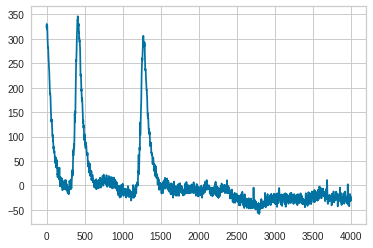

In [ ]:
plt.plot(all_trials[0,:,0])

In [ ]:
all_trials_reshape=[]
for trial in all_trials:
  all_channels=[]
  for channel in range(62):
    all_channels.append(trial[:,channel])
  all_trials_reshape.append(all_channels)

all_trials_reshape=np.array(all_trials_reshape)
all_trials_reshape.shape

(200, 62, 4000)

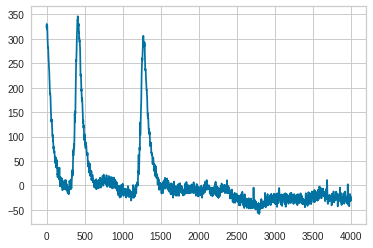

In [ ]:
plt.plot(all_trials_reshape[0,0,:])

In [ ]:
tmin=0
sample_epochs = mne.EpochsArray(all_trials_reshape, info, events, tmin, event_id)

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [ ]:
sample_epochs.get_data().shape

(200, 62, 4000)

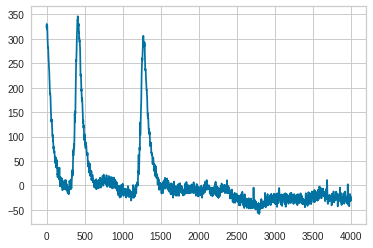

In [ ]:
plt.plot(sample_epochs.get_data()[0,0,:])

In [ ]:
sample_epochs.filter(8., 30., fir_design='firwin', skip_by_annotation='edge')

Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (1.651 sec)



Number of events,200
Events,left_hand: 50left_hand_transitional: 50right_hand: 50right_hand_transitional: 50
Time range,0.000 – 3.999 sec
Baseline,off


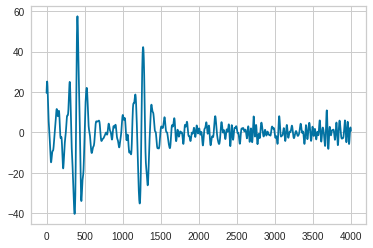

In [ ]:
plt.plot(sample_epochs.get_data()[0,0,:])

In [ ]:
l = [sample_epochs]
with open("/content/drive/MyDrive/Brain Powerrrrrrrr/sample", "wb") as fp:   #Pickling
  pickle.dump(l, fp)

with open("/content/drive/MyDrive/Brain Powerrrrrrrr/sample", "rb") as fp:   # Unpickling
  b = pickle.load(fp)
print(b)

[<EpochsArray |  200 events (all good), 0 - 3.999 sec, baseline off, ~378.5 MB, data loaded,
 'right_hand': 50
 'left_hand': 50
 'right_hand_transitional': 50
 'left_hand_transitional': 50>]


In [ ]:
info_event = [info,event_id]
with open("/content/drive/MyDrive/Brain Powerrrrrrrr/info_event", "wb") as fp:   #Pickling
  pickle.dump(info_event, fp)

with open("/content/drive/MyDrive/Brain Powerrrrrrrr/info_event", "rb") as fp:   # Unpickling
  info_event = pickle.load(fp)
print(info_event)

[<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 62 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 62
 projs: []
 sfreq: 1000.0 Hz
>, {'right_hand': 0, 'left_hand': 1, 'right_hand_transitional': 2, 'left_hand_transitional': 3}]


In [ ]:
del sess_subj1,l,sample_epochs,all_trials_reshape,all_trials,events
gc.collect()

148

In [ ]:
xxx=[]

In [ ]:
xxx.append(data)

In [ ]:
np.array(xxx).shape

(2, 200, 4)

In [ ]:
np.array(xxx)[1,0,:]

array([-0.06310755, -0.09055293, -0.6897742 , -0.44201765])

In [ ]:
np.vstack(np.array(xxx))[200,:]

array([-0.06310755, -0.09055293, -0.6897742 , -0.44201765])

In [ ]:
np.vstack(np.array(xxx)).shape

(400, 4)

In [ ]:
csp = CSP(n_components=4, reg=None, log=False, norm_trace=False)

sess_path_list=['/content/drive/Shareddrives/Week10_EEG_Classification/session1/',
           '/content/drive/Shareddrives/Week10_EEG_Classification/session2/']

for sess_path in sess_path_list:
  for sess_file in tqdm(os.listdir(sess_path)):
    file_path=sess_path+sess_file
    matlab_file=loadmat(file_path)

    all_labels=[]
    all_events=[]

    for i in range(100):
      label2=matlab_file['EEG_MI_test'][0][0][1][0][i]
      event2=matlab_file['EEG_MI_test'][0][0][2][0][i]
      
      event1=event2-2000

      if label2==0:
        label1=2
      else:
        label1=3
      
      all_events.append(event1)
      all_events.append(event2)
      all_labels.append(label1)
      all_labels.append(label2)

    events = np.column_stack((np.array(all_events),np.zeros(len(all_events),dtype = int),np.array(all_labels)))

    all_trials=[]
    for i in range(len(events)):
      onset=events[i,0]
      trial=matlab_file['EEG_MI_test'][0][0][0][onset:onset+4000]
      all_trials.append(trial)

    all_trials=np.array(all_trials)

    all_trials_reshape=[]
    for trial in all_trials:
      all_channels=[]
      for channel in range(62):
        all_channels.append(trial[:,channel])
      all_trials_reshape.append(all_channels)

    all_trials_reshape=np.array(all_trials_reshape)

    epochs = mne.EpochsArray(all_trials_reshape, info, events, tmin, event_id)
    epochs.filter(8., 30., fir_design='firwin', skip_by_annotation='edge')

    data=csp.fit(epochs.get_data(),epochs.events[:, -1])
    
    del matlab_file,all_labels,all_events,events,all_trials,all_trials_reshape,epochs
    gc.collect()

In [ ]:
with open("/content/drive/MyDrive/Brain Powerrrrrrrr/csp", "wb") as fp:   #Pickling
  pickle.dump(csp, fp)

with open("/content/drive/MyDrive/Brain Powerrrrrrrr/csp", "rb") as fp:   # Unpickling
  b = pickle.load(fp)
print(b)

CSP(component_order='mutual_info', cov_est='concat', cov_method_params=None,
  log=False, n_components=4, norm_trace=False, rank=None, reg=None,
  transform_into='average_power')


In [ ]:
full_X=[]
full_y=[]

sess_path_list=['/content/drive/Shareddrives/Week10_EEG_Classification/session1/',
           '/content/drive/Shareddrives/Week10_EEG_Classification/session2/']

for sess_path in sess_path_list:
  for sess_file in tqdm(os.listdir(sess_path)):
    file_path=sess_path+sess_file
    matlab_file=loadmat(file_path)

    all_labels=[]
    all_events=[]

    for i in range(100):
      label2=matlab_file['EEG_MI_test'][0][0][1][0][i]
      event2=matlab_file['EEG_MI_test'][0][0][2][0][i]
      
      event1=event2-2000

      if label2==0:
        label1=2
      else:
        label1=3
      
      all_events.append(event1)
      all_events.append(event2)
      all_labels.append(label1)
      all_labels.append(label2)

    events = np.column_stack((np.array(all_events),np.zeros(len(all_events),dtype = int),np.array(all_labels)))

    all_trials=[]
    for i in range(len(events)):
      onset=events[i,0]
      trial=matlab_file['EEG_MI_test'][0][0][0][onset:onset+4000]
      all_trials.append(trial)

    all_trials=np.array(all_trials)

    all_trials_reshape=[]
    for trial in all_trials:
      all_channels=[]
      for channel in range(62):
        all_channels.append(trial[:,channel])
      all_trials_reshape.append(all_channels)

    all_trials_reshape=np.array(all_trials_reshape)

    epochs = mne.EpochsArray(all_trials_reshape, info, events, tmin, event_id)
    epochs.filter(8., 30., fir_design='firwin', skip_by_annotation='edge')

    data=csp.transform(epochs.get_data())
    label=epochs.events[:, -1]

    full_X.append(data)
    full_y.append(label)
    
    del matlab_file,all_labels,all_events,events,all_trials,all_trials_reshape,epochs,data,label
    gc.collect()

In [ ]:
full_X=np.vstack(np.array(full_X))
full_X.shape

(20800, 4)

In [ ]:
full_y=np.array(full_y)
full_y.shape

(104, 200)

In [ ]:
full_y[1,:]

array([3, 1, 3, 1, 3, 1, 2, 0, 2, 0, 3, 1, 3, 1, 3, 1, 2, 0, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 2, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 0, 3, 1, 2, 0,
       2, 0, 3, 1, 2, 0, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       3, 1, 2, 0, 2, 0, 2, 0, 3, 1, 2, 0, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0,
       2, 0, 3, 1, 3, 1, 2, 0, 3, 1, 3, 1, 3, 1, 2, 0, 2, 0, 3, 1, 3, 1,
       3, 1, 2, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 0, 3, 1, 2, 0, 3, 1, 3, 1,
       2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 2, 0, 3, 1, 3, 1,
       3, 1, 2, 0, 2, 0, 3, 1, 2, 0, 3, 1, 3, 1, 2, 0, 2, 0, 3, 1, 2, 0,
       2, 0, 3, 1, 3, 1, 3, 1, 3, 1, 2, 0, 2, 0, 2, 0, 3, 1, 2, 0, 2, 0,
       3, 1])

In [ ]:
full_y.flatten()[200:400]==full_y[1,:]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
full_y=full_y.flatten()

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/full_X',full_X)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/full_y',full_y)

In [ ]:
test_data=np.load('/content/drive/Shareddrives/Week10_EEG_Classification/x_test.npy')

In [ ]:
test_data.shape

(400, 62, 4000)

In [ ]:
test_data_epoch=mne.EpochsArray(test_data,info)
test_data_epoch.get_data().shape

Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


(400, 62, 4000)

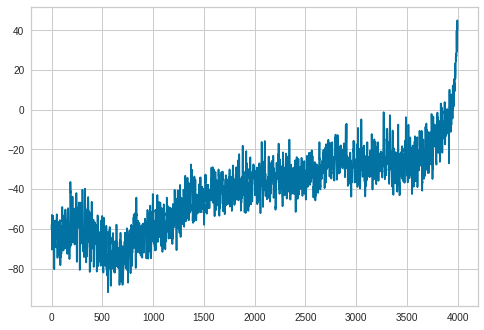

In [ ]:
plt.plot(test_data_epoch.get_data()[0,0,:])

In [ ]:
test_data_epoch.filter(8., 30., fir_design='firwin', skip_by_annotation='edge')

Setting up band-pass filter from 8 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (1.651 sec)



Number of events,400
Events,1: 400
Time range,0.000 – 3.999 sec
Baseline,off


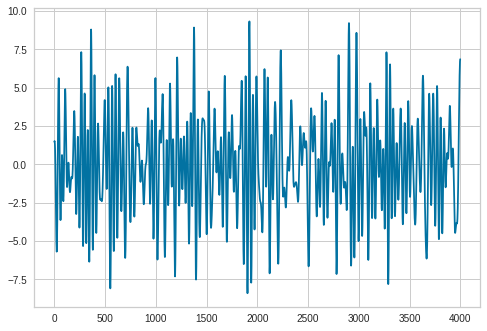

In [ ]:
plt.plot(test_data_epoch.get_data()[0,0,:])

In [ ]:
with open("/content/drive/MyDrive/Brain Powerrrrrrrr/csp", "rb") as fp:   # Unpickling
  csp = pickle.load(fp)
print(csp)

CSP(component_order='mutual_info', cov_est='concat', cov_method_params=None,
  log=False, n_components=4, norm_trace=False, rank=None, reg=None,
  transform_into='average_power')


In [ ]:
test_data=csp.transform(test_data_epoch.get_data())
test_data.shape

(400, 4)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/test_data',test_data)

# ML อีกรอบโดยใช้ MNE

In [ ]:
full_X_train=np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/full_X.npy')
full_y_train=np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/full_y.npy')
X_test=np.load('/content/drive/MyDrive/Brain Powerrrrrrrr/x_test.npy')

In [ ]:
lda = LinearDiscriminantAnalysis()

trial_length=len(full_X_train)

X_train=full_X_train[0:int(0.8*trial_length),:]
y_train=full_y_train[0:int(0.8*trial_length)]
X_test=full_X_train[int(0.8*trial_length):,:]
y_test=full_y_train[int(0.8*trial_length):]

lda.fit(X_train, y_train)

predict=lda.predict(X_test)
print(accuracy_score(y_test,predict))

0.290625


In [ ]:
df=pd.DataFrame(full_X_train)
df.head()

,0,1,2,3
0,-0.113019,-0.819745,-0.133077,0.397178
1,-0.118505,-0.811397,-0.105373,0.367533
2,-0.120177,-0.809124,-0.120290,0.383236
3,-0.123739,-0.813375,-0.147867,0.362158
4,-0.121787,-0.731368,-0.158211,0.290506


In [ ]:
df=df.rename(columns={0:'CSP0',1:'CSP1',2:'CSP2',3:'CSP3'})
df

,CSP0,CSP1,CSP2,CSP3
0,-0.113019,-0.819745,-0.133077,0.397178
1,-0.118505,-0.811397,-0.105373,0.367533
2,-0.120177,-0.809124,-0.120290,0.383236
3,-0.123739,-0.813375,-0.147867,0.362158
4,-0.121787,-0.731368,-0.158211,0.290506
...,...,...,...,...
20795,-0.120826,-0.588795,-0.223858,-0.331389
20796,-0.094423,1.433212,-0.076557,-0.119439
20797,-0.087193,0.377280,-0.111205,-0.138328
20798,-0.034311,1.824542,2.564679,0.217007


In [ ]:
df=pd.concat([df,pd.Series(full_y_train)],axis=1)
df=df.rename(columns={0:'label'})
df

,CSP0,CSP1,CSP2,CSP3,label
0,-0.113019,-0.819745,-0.133077,0.397178,3
1,-0.118505,-0.811397,-0.105373,0.367533,1
2,-0.120177,-0.809124,-0.120290,0.383236,3
3,-0.123739,-0.813375,-0.147867,0.362158,1
4,-0.121787,-0.731368,-0.158211,0.290506,3
...,...,...,...,...,...
20795,-0.120826,-0.588795,-0.223858,-0.331389,1
20796,-0.094423,1.433212,-0.076557,-0.119439,2
20797,-0.087193,0.377280,-0.111205,-0.138328,0
20798,-0.034311,1.824542,2.564679,0.217007,3


In [ ]:
models=setup(data=df, target='label', train_size=0.8,
               numeric_features=['CSP0','CSP1','CSP2','CSP3'],
               normalize=True,
               silent=True)

best_model=compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2909,0.5578,0.2886,0.2976,0.2386,0.0519,0.0604,0.433
gbc,Gradient Boosting Classifier,0.2904,0.5564,0.2895,0.2927,0.2801,0.0528,0.0541,4.954
ridge,Ridge Classifier,0.2903,0.0000,0.2879,0.3319,0.2320,0.0509,0.0607,0.015
lda,Linear Discriminant Analysis,0.2899,0.5569,0.2876,0.3066,0.2360,0.0505,0.0591,0.022
rf,Random Forest Classifier,0.2855,0.5479,0.2852,0.2849,0.2846,0.0470,0.0471,2.042
et,Extra Trees Classifier,0.2850,0.5464,0.2848,0.2843,0.2842,0.0465,0.0465,1.210
lightgbm,Light Gradient Boosting Machine,0.2841,0.5547,0.2836,0.2835,0.2814,0.0450,0.0452,0.479
ada,Ada Boost Classifier,0.2819,0.5495,0.2809,0.2829,0.2690,0.0413,0.0426,0.349
knn,K Neighbors Classifier,0.2697,0.5299,0.2693,0.2690,0.2646,0.0258,0.0261,0.096
dt,Decision Tree Classifier,0.2680,0.5119,0.2679,0.2679,0.2678,0.0239,0.0239,0.080


In [ ]:
# band = [4 40];
# channel_index = ['FC5', 'FC3', 'FC1', 'FC2', 'FC4','FC6','C5','C3','C1','Cz','C2','C4','C6','CP5','CP3','CP1','CPz','CP2','CP4','CP6'];

# Preprocess for contribute

In [ ]:
with open("/content/drive/MyDrive/Brain Powerrrrrrrr/info_event", "rb") as fp:   # Unpickling
  info_event = pickle.load(fp)

In [ ]:
info_event

[<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 62 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: unspecified
 nchan: 62
 projs: []
 sfreq: 1000.0 Hz
>,
 {'left_hand': 1,
  'left_hand_transitional': 3,
  'right_hand': 0,
  'right_hand_transitional': 2}]

In [ ]:
info, event_id=info_event[0],info_event[1]
tmin=0

In [ ]:
sample_matlab=os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1/')[0]
sample_matlab_file=loadmat('/content/drive/Shareddrives/Week10_EEG_Classification/session1/'+os.listdir('/content/drive/Shareddrives/Week10_EEG_Classification/session1/')[0])

In [ ]:
all_labels=[]
all_events=[]

for i in range(1):
      label2=sample_matlab_file['EEG_MI_test'][0][0][1][0][i]
      event2=sample_matlab_file['EEG_MI_test'][0][0][2][0][i]
      
      event1=event2-2000

      if label2==0:
        label1=2
      else:
        label1=3
      
      all_events.append(event1)
      all_events.append(event2)
      all_labels.append(label1)
      all_labels.append(label2)

In [ ]:
all_events

[154965, 156965]

In [ ]:
events = np.column_stack((np.array(all_events),np.zeros(len(all_events),dtype = int),np.array(all_labels)))
events

array([[154965,      0,      3],
       [156965,      0,      1]])

In [ ]:
info_event[1]

{'left_hand': 1,
 'left_hand_transitional': 3,
 'right_hand': 0,
 'right_hand_transitional': 2}

In [ ]:
all_trials=[]
for i in range(len(events)):
  onset=events[i,0]
  trial=sample_matlab_file['EEG_MI_test'][0][0][0][onset:onset+4000]
  all_trials.append(trial)

all_trials=np.array(all_trials)

all_trials_reshape=[]
for trial in all_trials:
  all_channels=[]
  for channel in range(62):
    all_channels.append(trial[:,channel])
  all_trials_reshape.append(all_channels)

all_trials_reshape=np.array(all_trials_reshape)

epochs = mne.EpochsArray(all_trials_reshape, info_event[0], events, tmin, event_id={'left_hand': 1,'left_hand_transitional': 3})

Not setting metadata
2 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


In [ ]:
epochs.get_data().shape

(2, 62, 4000)

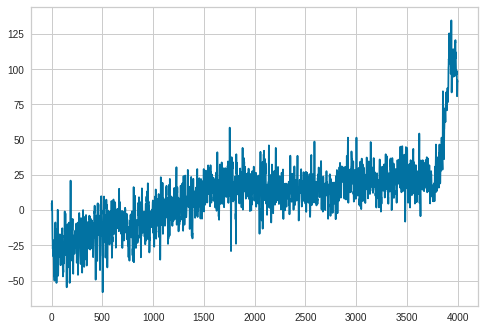

In [ ]:
plt.plot(sample_matlab_file['EEG_MI_test'][0][0][0][154965:154965+4000][:,0])

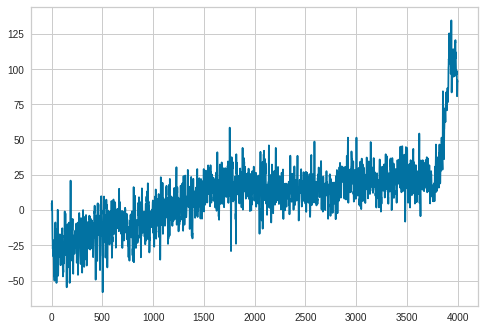

In [ ]:
plt.plot(epochs.get_data()[0,0,:])

In [ ]:
mne.filter.resample(epochs.get_data(),down=10).shape

(2, 62, 400)

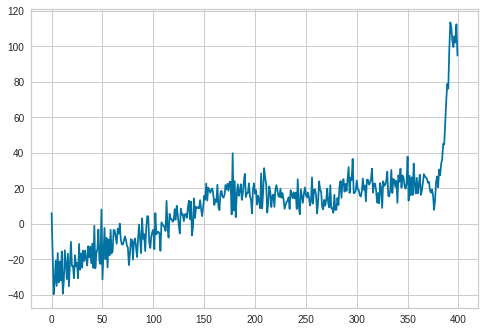

In [ ]:
plt.plot(mne.filter.resample(epochs.get_data(),down=10)[0,0,:])

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 1651 samples (1.651 sec)



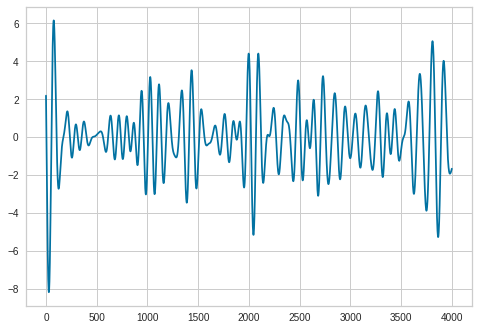

In [ ]:
plt.plot(epochs.filter(8., 12., fir_design='firwin', skip_by_annotation='edge').get_data()[0,0,:])

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 1651 samples (1.651 sec)



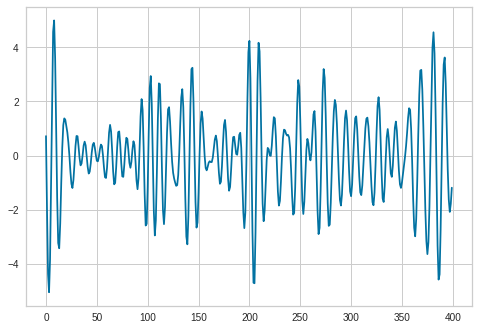

In [ ]:
plt.plot(mne.filter.resample(epochs.filter(8., 12., fir_design='firwin', skip_by_annotation='edge').get_data(),down=10)[0,0,:])

In [ ]:
full_X_share=[]
full_y_share=[]

sess_path_list=['/content/drive/Shareddrives/Week10_EEG_Classification/session1/',
           '/content/drive/Shareddrives/Week10_EEG_Classification/session2/']

for sess_path in sess_path_list:
  for sess_file in tqdm(os.listdir(sess_path)):
    file_path=sess_path+sess_file
    matlab_file=loadmat(file_path)

    all_labels=[]
    all_events=[]

    for i in range(100):
      label2=matlab_file['EEG_MI_test'][0][0][1][0][i]
      event2=matlab_file['EEG_MI_test'][0][0][2][0][i]
      
      event1=event2-2000

      if label2==0:
        label1=2
      else:
        label1=3
      
      all_events.append(event1)
      all_events.append(event2)
      all_labels.append(label1)
      all_labels.append(label2)

    events = np.column_stack((np.array(all_events),np.zeros(len(all_events),dtype = int),np.array(all_labels)))

    all_trials=[]
    for i in range(len(events)):
      onset=events[i,0]
      trial=matlab_file['EEG_MI_test'][0][0][0][onset:onset+4000]
      all_trials.append(trial)

    all_trials=np.array(all_trials)

    all_trials_reshape=[]
    for trial in all_trials:
      all_channels=[]
      for channel in range(62):
        all_channels.append(trial[:,channel])
      all_trials_reshape.append(all_channels)

    all_trials_reshape=np.array(all_trials_reshape)

    epochs = mne.EpochsArray(all_trials_reshape, info, events, tmin, event_id)
    #epochs.filter(8., 12., fir_design='firwin', skip_by_annotation='edge')

    data=mne.filter.resample(epochs.get_data(),down=10)
    label=epochs.events[:, -1]

    full_X_share.append(data)
    full_y_share.append(label)
    
    del matlab_file,all_labels,all_events,events,all_trials,all_trials_reshape,epochs
    gc.collect()

  0%|          | 0/52 [00:00<?, ?it/s]

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activat

  0%|          | 0/52 [00:00<?, ?it/s]

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activat

In [ ]:
np.array(full_X_share).shape

(104, 200, 62, 400)

In [ ]:
np.vstack(np.array(full_X_share)).shape

(20800, 62, 400)

In [ ]:
full_X_share=np.vstack(np.array(full_X_share))

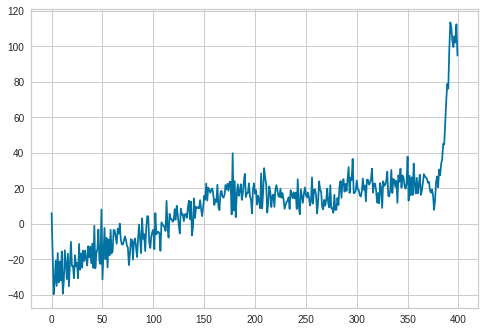

In [ ]:
plt.plot(full_X_share[0,0,:])

In [ ]:
full_y_share=np.array(full_y_share)
full_y_share.shape

(104, 200)

In [ ]:
full_y_share.flatten().shape

(20800,)

In [ ]:
full_y_share=full_y_share.flatten()

In [ ]:
full_y_share[0]

3

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_data_no_bandpass',full_X_share)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/online_label_no_bandpass',full_y_share)

In [ ]:
test_data=np.load('/content/drive/Shareddrives/Week10_EEG_Classification/x_test.npy')

In [ ]:
test_data_epoch=mne.EpochsArray(test_data,info)
test_data_epoch.get_data().shape

Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


(400, 62, 4000)

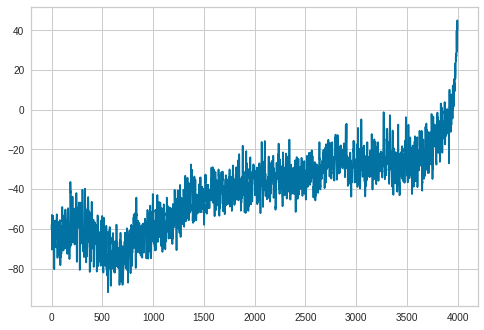

In [ ]:
plt.plot(test_data[0,0,:])

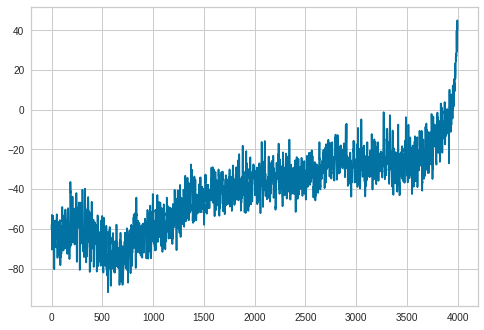

In [ ]:
plt.plot(test_data_epoch.get_data()[0,0,:])

In [ ]:
test_data_epoch.filter(8., 12., fir_design='firwin', skip_by_annotation='edge')

Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 1651 samples (1.651 sec)



Number of events,400
Events,1: 400
Time range,0.000 – 3.999 sec
Baseline,off


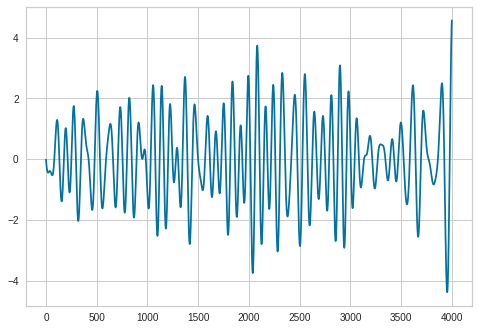

In [ ]:
plt.plot(test_data_epoch.get_data()[0,0,:])

In [ ]:
mne.filter.resample(test_data_epoch.get_data(),down=10).shape

(400, 62, 400)

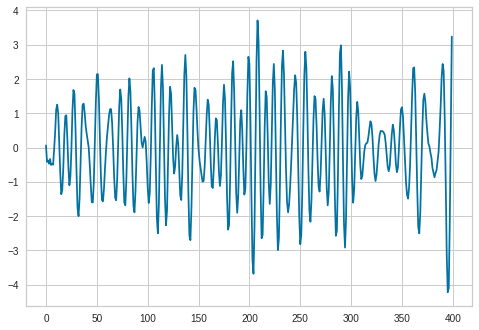

In [ ]:
plt.plot(mne.filter.resample(test_data_epoch.get_data(),down=10)[0,0,:])

In [ ]:
test_data=mne.filter.resample(test_data_epoch.get_data(),down=10)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/test_data_bandpass_8_12',test_data)

In [ ]:
full_X_share=[]
full_y_share=[]

sess_path_list=['/content/drive/Shareddrives/Week10_EEG_Classification/session1/',
           '/content/drive/Shareddrives/Week10_EEG_Classification/session2/']

for sess_path in sess_path_list:
  for sess_file in tqdm(os.listdir(sess_path)):
    file_path=sess_path+sess_file
    matlab_file=loadmat(file_path)

    all_labels=[]
    all_events=[]

    for i in range(100):
      label2=matlab_file['EEG_MI_train'][0][0][1][0][i]
      event2=matlab_file['EEG_MI_train'][0][0][2][0][i]
      
      event1=event2-2000

      if label2==0:
        label1=2
      else:
        label1=3
      
      all_events.append(event1)
      all_events.append(event2)
      all_labels.append(label1)
      all_labels.append(label2)

    events = np.column_stack((np.array(all_events),np.zeros(len(all_events),dtype = int),np.array(all_labels)))

    all_trials=[]
    for i in range(len(events)):
      onset=events[i,0]
      trial=matlab_file['EEG_MI_train'][0][0][0][onset:onset+4000]
      all_trials.append(trial)

    all_trials=np.array(all_trials)

    all_trials_reshape=[]
    for trial in all_trials:
      all_channels=[]
      for channel in range(62):
        all_channels.append(trial[:,channel])
      all_trials_reshape.append(all_channels)

    all_trials_reshape=np.array(all_trials_reshape)

    epochs = mne.EpochsArray(all_trials_reshape, info, events, tmin, event_id)
    #epochs.filter(8., 12., fir_design='firwin', skip_by_annotation='edge')

    data=mne.filter.resample(epochs.get_data(),down=10)
    label=epochs.events[:, -1]

    full_X_share.append(data)
    full_y_share.append(label)
    
    del matlab_file,all_labels,all_events,events,all_trials,all_trials_reshape,epochs
    gc.collect()

  0%|          | 0/52 [00:00<?, ?it/s]

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activat

  0%|          | 0/52 [00:00<?, ?it/s]

Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activat

In [ ]:
print(np.vstack(np.array(full_X_share)).shape)
print(np.array(full_y_share).flatten().shape)

(20800, 62, 400)
(20800,)


In [ ]:
full_X_share=np.vstack(np.array(full_X_share))
full_y_share=np.array(full_y_share).flatten()

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/offline_data_no_bandpass',full_X_share)
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/offline_label_no_bandpass',full_y_share)

In [ ]:
del full_X_share,full_y_share,test_data
gc.collect()

472

In [ ]:
final_test_data=np.load('/content/drive/MyDrive/Week10-Brain-Wave/x_test_final.npy')

In [ ]:
final_test_data_epoch=mne.EpochsArray(final_test_data,info)
final_test_data_epoch.get_data().shape

Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


(400, 62, 4000)

In [ ]:
#final_test_data_epoch.filter(8., 12., fir_design='firwin', skip_by_annotation='edge')

In [ ]:
mne.filter.resample(final_test_data_epoch.get_data(),down=10).shape

(400, 62, 400)

In [ ]:
final_test_data=mne.filter.resample(final_test_data_epoch.get_data(),down=10)

In [ ]:
np.save('/content/drive/MyDrive/Brain Powerrrrrrrr/final_test_data_no_bandpass',final_test_data)